<a href="https://colab.research.google.com/github/Ishakasar/News-popularity-in-multiple-social-media-platforms/blob/main/Isha_Kasar_Team_4_Capstone_Project_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Predicting the news popularity in multiple social media platforms. </u></b>

## <b> Problem Description </b>

### This is a large data set of news items and their respective social feedback on multiple platforms: Facebook, Google+ and LinkedIn.The collected data relates to a period of 8 months, between November 2015 and July 2016, accounting for about 100,000 news items on four different topics: Economy, Microsoft, Obama and Palestine.


## <b> Data Description </b>

### <b>Attribute Information: </b>

* ### IDLink (numeric): Unique identifier of news items
* ### Title (string): Title of the news item according to the official media sources
* ### Headline (string): Headline of the news item according to the official media sources
* ### Source (string): Original news outlet that published the news item
* ### Topic (string): Query topic used to obtain the items in the official media sources
* ### PublishDate (timestamp): Date and time of the news items' publication
* ### SentimentTitle (numeric): Sentiment score of the text in the news items' title
* ### SentimentHeadline (numeric): Sentiment score of the text in the news items' headline
* ### Facebook (numeric): Final value of the news items' popularity according to the social media source Facebook
* ### GooglePlus (numeric): Final value of the news items' popularity according to the social media source Google+
* ### LinkedIn (numeric): Final value of the news items' popularity according to the social media source LinkedIn


### VARIABLES OF SOCIAL FEEDBACK DATA

* ### IDLink (numeric): Unique identifier of news items
* ### TS1 (numeric): Level of popularity in time slice 1 (0-20 minutes upon publication)
* ### TS2 (numeric): Level of popularity in time slice 2 (20-40 minutes upon publication)
* ### TS... (numeric): Level of popularity in time slice ...
* ### TS144 (numeric): Final level of popularity after 2 days upon publication

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df= pd.read_csv('/content/drive/MyDrive/AlmaBetter/Cohort Aravali/Module 4/Week 2/Data & Resources/News_Final.csv')

In [4]:
df.head()

,IDLink,Title,Headline,Source,Topic,PublishDate,SentimentTitle,SentimentHeadline,Facebook,GooglePlus,LinkedIn
0,99248.0,Obama Lays Wreath at Arlington National Cemetery,Obama Lays Wreath at Arlington National Cemete...,USA TODAY,obama,2002-04-02 00:00:00,0.000000,-0.053300,-1,-1,-1
1,10423.0,A Look at the Health of the Chinese Economy,"Tim Haywood, investment director business-unit...",Bloomberg,economy,2008-09-20 00:00:00,0.208333,-0.156386,-1,-1,-1
2,18828.0,Nouriel Roubini: Global Economy Not Back to 2008,"Nouriel Roubini, NYU professor and chairman at...",Bloomberg,economy,2012-01-28 00:00:00,-0.425210,0.139754,-1,-1,-1
3,27788.0,Finland GDP Expands In Q4,Finland's economy expanded marginally in the t...,RTT News,economy,2015-03-01 00:06:00,0.000000,0.026064,-1,-1,-1
4,27789.0,"Tourism, govt spending buoys Thai economy in J...",Tourism and public spending continued to boost...,The Nation - Thailand&#39;s English news,economy,2015-03-01 00:11:00,0.000000,0.141084,-1,-1,-1


In [5]:
df.describe()

,IDLink,SentimentTitle,SentimentHeadline,Facebook,GooglePlus,LinkedIn
count,93239.000000,93239.000000,93239.000000,93239.000000,93239.000000,93239.000000
mean,51560.653257,-0.005411,-0.027493,113.141336,3.888362,16.547957
std,30391.078704,0.136431,0.141964,620.173233,18.492648,154.459048
min,1.000000,-0.950694,-0.755433,-1.000000,-1.000000,-1.000000
25%,24301.500000,-0.079057,-0.114574,0.000000,0.000000,0.000000
50%,52275.000000,0.000000,-0.026064,5.000000,0.000000,0.000000
75%,76585.500000,0.064255,0.059709,33.000000,2.000000,4.000000
max,104802.000000,0.962354,0.964646,49211.000000,1267.000000,20341.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93239 entries, 0 to 93238
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   IDLink             93239 non-null  float64
 1   Title              93239 non-null  object 
 2   Headline           93224 non-null  object 
 3   Source             92960 non-null  object 
 4   Topic              93239 non-null  object 
 5   PublishDate        93239 non-null  object 
 6   SentimentTitle     93239 non-null  float64
 7   SentimentHeadline  93239 non-null  float64
 8   Facebook           93239 non-null  int64  
 9   GooglePlus         93239 non-null  int64  
 10  LinkedIn           93239 non-null  int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 7.8+ MB


In [7]:
df.isnull().sum()

IDLink                 0
Title                  0
Headline              15
Source               279
Topic                  0
PublishDate            0
SentimentTitle         0
SentimentHeadline      0
Facebook               0
GooglePlus             0
LinkedIn               0
dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


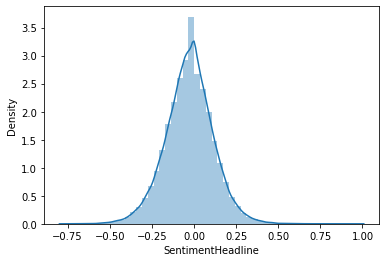

In [8]:
sns.distplot(df['SentimentHeadline'])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


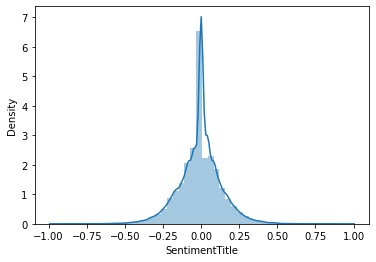

In [9]:
sns.distplot(df['SentimentTitle'])

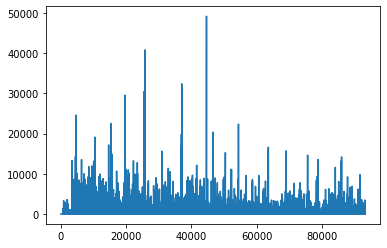

In [10]:
plt.plot(df['Facebook'])

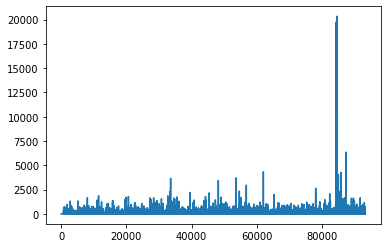

In [11]:
plt.plot(df['LinkedIn'])

In [12]:
df.dropna(inplace= True)

In [13]:
df.isna().sum()

IDLink               0
Title                0
Headline             0
Source               0
Topic                0
PublishDate          0
SentimentTitle       0
SentimentHeadline    0
Facebook             0
GooglePlus           0
LinkedIn             0
dtype: int64

In [14]:
df.drop(['IDLink','Source','PublishDate'], axis = 1, inplace= True)

In [15]:
df = pd.get_dummies(df, columns=['Topic'])

In [16]:
df[df['Facebook'] == -1 ] 

,Title,Headline,SentimentTitle,SentimentHeadline,Facebook,GooglePlus,LinkedIn,Topic_economy,Topic_microsoft,Topic_obama,Topic_palestine
0,Obama Lays Wreath at Arlington National Cemetery,Obama Lays Wreath at Arlington National Cemete...,0.000000,-0.053300,-1,-1,-1,0,0,1,0
1,A Look at the Health of the Chinese Economy,"Tim Haywood, investment director business-unit...",0.208333,-0.156386,-1,-1,-1,1,0,0,0
2,Nouriel Roubini: Global Economy Not Back to 2008,"Nouriel Roubini, NYU professor and chairman at...",-0.425210,0.139754,-1,-1,-1,1,0,0,0
3,Finland GDP Expands In Q4,Finland's economy expanded marginally in the t...,0.000000,0.026064,-1,-1,-1,1,0,0,0
4,"Tourism, govt spending buoys Thai economy in J...",Tourism and public spending continued to boost...,0.000000,0.141084,-1,-1,-1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
93231,UK economy heading for marked slowdown after s...,"LONDON, (Reuters) – Britain's economy looks se...",0.000000,-0.196260,-1,0,0,1,0,0,0
93232,UK economy heading for marked slowdown after Q...,"LONDON, July 7 (Reuters) - Britain's economy l...",0.037689,-0.191747,-1,0,0,1,0,0,0
93234,Stocks rise as investors key in on US economy ...,The June employment report is viewed as a cruc...,0.104284,0.044943,-1,3,5,1,0,0,0
93235,Russian PM proposes to use conservative and to...,"In addition, establish stimulating economic po...",0.072194,0.000000,-1,0,1,1,0,0,0


In [17]:
df[df['LinkedIn'] == -1 ] 

,Title,Headline,SentimentTitle,SentimentHeadline,Facebook,GooglePlus,LinkedIn,Topic_economy,Topic_microsoft,Topic_obama,Topic_palestine
0,Obama Lays Wreath at Arlington National Cemetery,Obama Lays Wreath at Arlington National Cemete...,0.000000,-0.053300,-1,-1,-1,0,0,1,0
1,A Look at the Health of the Chinese Economy,"Tim Haywood, investment director business-unit...",0.208333,-0.156386,-1,-1,-1,1,0,0,0
2,Nouriel Roubini: Global Economy Not Back to 2008,"Nouriel Roubini, NYU professor and chairman at...",-0.425210,0.139754,-1,-1,-1,1,0,0,0
3,Finland GDP Expands In Q4,Finland's economy expanded marginally in the t...,0.000000,0.026064,-1,-1,-1,1,0,0,0
4,"Tourism, govt spending buoys Thai economy in J...",Tourism and public spending continued to boost...,0.000000,0.141084,-1,-1,-1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
92107,WISeKey Joins Forces with Microsoft CityNext t...,"WISeKey International Holding Ltd , a leading ...",-0.125000,0.015450,-1,-1,-1,0,1,0,0
92148,"Monsanto, Microsoft to invest in agricultural ...",U.S. biotech company Monsanto Co and Microsoft...,0.000000,-0.074355,-1,-1,-1,0,1,0,0
92272,Cruz: Obama's 'willful blindness' is dangerous,crescent and star A Senate subcommittee recent...,0.000000,0.059963,-1,-1,-1,0,0,1,0
92325,Tinkering with South Africa's fiscal policy un...,South Africa's economy is not growing fast eno...,-0.056533,-0.249789,-1,-1,-1,1,0,0,0


In [18]:
df[df['GooglePlus'] == -1 ] 

,Title,Headline,SentimentTitle,SentimentHeadline,Facebook,GooglePlus,LinkedIn,Topic_economy,Topic_microsoft,Topic_obama,Topic_palestine
0,Obama Lays Wreath at Arlington National Cemetery,Obama Lays Wreath at Arlington National Cemete...,0.000000,-0.053300,-1,-1,-1,0,0,1,0
1,A Look at the Health of the Chinese Economy,"Tim Haywood, investment director business-unit...",0.208333,-0.156386,-1,-1,-1,1,0,0,0
2,Nouriel Roubini: Global Economy Not Back to 2008,"Nouriel Roubini, NYU professor and chairman at...",-0.425210,0.139754,-1,-1,-1,1,0,0,0
3,Finland GDP Expands In Q4,Finland's economy expanded marginally in the t...,0.000000,0.026064,-1,-1,-1,1,0,0,0
4,"Tourism, govt spending buoys Thai economy in J...",Tourism and public spending continued to boost...,0.000000,0.141084,-1,-1,-1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
92107,WISeKey Joins Forces with Microsoft CityNext t...,"WISeKey International Holding Ltd , a leading ...",-0.125000,0.015450,-1,-1,-1,0,1,0,0
92148,"Monsanto, Microsoft to invest in agricultural ...",U.S. biotech company Monsanto Co and Microsoft...,0.000000,-0.074355,-1,-1,-1,0,1,0,0
92272,Cruz: Obama's 'willful blindness' is dangerous,crescent and star A Senate subcommittee recent...,0.000000,0.059963,-1,-1,-1,0,0,1,0
92325,Tinkering with South Africa's fiscal policy un...,South Africa's economy is not growing fast eno...,-0.056533,-0.249789,-1,-1,-1,1,0,0,0


In [19]:
df.head()

,Title,Headline,SentimentTitle,SentimentHeadline,Facebook,GooglePlus,LinkedIn,Topic_economy,Topic_microsoft,Topic_obama,Topic_palestine
0,Obama Lays Wreath at Arlington National Cemetery,Obama Lays Wreath at Arlington National Cemete...,0.000000,-0.053300,-1,-1,-1,0,0,1,0
1,A Look at the Health of the Chinese Economy,"Tim Haywood, investment director business-unit...",0.208333,-0.156386,-1,-1,-1,1,0,0,0
2,Nouriel Roubini: Global Economy Not Back to 2008,"Nouriel Roubini, NYU professor and chairman at...",-0.425210,0.139754,-1,-1,-1,1,0,0,0
3,Finland GDP Expands In Q4,Finland's economy expanded marginally in the t...,0.000000,0.026064,-1,-1,-1,1,0,0,0
4,"Tourism, govt spending buoys Thai economy in J...",Tourism and public spending continued to boost...,0.000000,0.141084,-1,-1,-1,1,0,0,0


In [20]:
text_df= df['Title'].str.cat(df['Headline'], sep =" ")



In [21]:
text_df=pd.DataFrame(text_df, columns=['Title'])

In [22]:
text_df['Facebook']= df['Facebook']

In [23]:
text_df.head()

,Title,Facebook
0,Obama Lays Wreath at Arlington National Cemete...,-1
1,A Look at the Health of the Chinese Economy Ti...,-1
2,Nouriel Roubini: Global Economy Not Back to 20...,-1
3,Finland GDP Expands In Q4 Finland's economy ex...,-1
4,"Tourism, govt spending buoys Thai economy in J...",-1


In [24]:
text_df.shape

(92945, 2)

In [25]:
text_df.head()

,Title,Facebook
0,Obama Lays Wreath at Arlington National Cemete...,-1
1,A Look at the Health of the Chinese Economy Ti...,-1
2,Nouriel Roubini: Global Economy Not Back to 20...,-1
3,Finland GDP Expands In Q4 Finland's economy ex...,-1
4,"Tourism, govt spending buoys Thai economy in J...",-1


In [26]:
text_df.tail()

,Title,Facebook
93234,Stocks rise as investors key in on US economy ...,-1
93235,Russian PM proposes to use conservative and to...,-1
93236,Palestinian Government Uses Foreign Aid To Pay...,5
93237,Palestine Youth Orchestra prepares for first U...,0
93238,Sausalito businesswoman wins $10000 in Microso...,-1


In [27]:
data=text_df[text_df['Facebook'] != -1 ] 

In [28]:
data.head()

,Title,Facebook
726,Microsoft offering £100 discount on original B...,0
727,Economy to improve though no change in last 6 ...,0
728,Economy to improve though no change in last 6 ...,0
729,Microsoft scales back free online storage plan...,0
730,IDC predicts the emergence of ‘DX economy’ KUC...,1


In [29]:
#import nltk
#nltk.download('stopwords')

In [30]:
import string
#from nltk.corpus import stopwords

In [31]:
punct = string.punctuation
punct

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [32]:
from spacy.lang.en import English
import re
from spacy.lang.en.stop_words import STOP_WORDS
nlp = English()
def spacy_tokenizer(sentence):
    mytokens = nlp(sentence)

    mytokens = [ word.lemma_.lower().strip() if word.lemma_ != "-PRON-" else word.lower_ for word in mytokens ]

    mytokens = [ word for word in mytokens if word not in STOP_WORDS and word not in string.punctuation and word.isalpha() ]
    
    return ' '.join(mytokens)
data['Spacy_token']=data['Title'].apply(spacy_tokenizer)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


In [33]:
data.head()

,Title,Facebook,Spacy_token
726,Microsoft offering £100 discount on original B...,0,microsoft offering discount original band uk p...
727,Economy to improve though no change in last 6 ...,0,economy improve change months assocham coming ...
728,Economy to improve though no change in last 6 ...,0,economy improve change months assocham new del...
729,Microsoft scales back free online storage plan...,0,microsoft scales free online storage plans new...
730,IDC predicts the emergence of ‘DX economy’ KUC...,1,idc predicts emergence dx economy kuching glob...


In [34]:
'''def text_process(msg):
    nopunc =[char for char in msg if char not in string.punctuation]
    nopunc=''.join(nopunc)
    return ' '.join([word for word in nopunc.split() if word.lower() not in stopwords.words('english')])
    '''

"def text_process(msg):\n    nopunc =[char for char in msg if char not in string.punctuation]\n    nopunc=''.join(nopunc)\n    return ' '.join([word for word in nopunc.split() if word.lower() not in stopwords.words('english')])\n    "

In [35]:
#data['Title'] = data['Title'].apply(text_process)

In [36]:
#stopset=stopwords.words('english')

In [37]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(use_idf=True, lowercase=True, strip_accents='ascii', stop_words=STOP_WORDS, min_df =50, max_df = 0.8)

In [38]:
X = vectorizer.fit_transform(data.Title)

/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ll', 'nt', 've'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


In [39]:
vectorizer.get_feature_names()

['00',
 '000',
 '01',
 '02',
 '03',
 '06',
 '08',
 '10',
 '100',
 '11',
 '12',
 '13',
 '14',
 '15',
 '150',
 '16',
 '17',
 '18',
 '19',
 '1948',
 '1st',
 '20',
 '200',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013',
 '2014',
 '2015',
 '2016',
 '2017',
 '2020',
 '2030',
 '21',
 '21st',
 '22',
 '23',
 '24',
 '25',
 '250',
 '26',
 '27',
 '28',
 '29',
 '30',
 '300',
 '31',
 '32',
 '33',
 '34',
 '35',
 '36',
 '360',
 '365',
 '38',
 '3d',
 '3rd',
 '40',
 '400',
 '42',
 '43',
 '44',
 '45',
 '47',
 '48',
 '49',
 '4th',
 '50',
 '500',
 '51',
 '52',
 '53',
 '54',
 '55',
 '550',
 '58',
 '60',
 '61',
 '63',
 '64',
 '650',
 '68',
 '70',
 '75',
 '80',
 '850',
 '90',
 '95',
 '950',
 '99',
 'aapl',
 'abbas',
 'abc',
 'abe',
 'ability',
 'able',
 'abortion',
 'abroad',
 'absolutely',
 'abu',
 'abuse',
 'academic',
 'academy',
 'accelerate',
 'accelerated',
 'accept',
 'accepted',
 'accepting',
 'access',
 'accompanied',
 'accord',
 'according',
 'account',
 'accounts',
 'accused

In [40]:
df1 = pd.DataFrame(X.todense() , columns=vectorizer.get_feature_names())

In [41]:
df1.drop(['00',
 '000',
 '01',
 '02',
 '03',
 '06',
 '08',
 '10',
 '100',
 '11',
 '12',
 '13',
 '14',
 '15',
 '150',
 '16',
 '17',
 '18',
 '19',
 '1948',
 '1st',
 '20',
 '200',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013',
 '2014',
 '2015',
 '2016',
 '2017',
 '2020',
 '2030',
 '21',
 '21st',
 '22',
 '23',
 '24',
 '25',
 '250',
 '26',
 '27',
 '28',
 '29',
 '30',
 '300',
 '31',
 '32',
 '33',
 '34',
 '35',
 '36',
 '360',
 '365',
 '38',
 '3d',
 '3rd',
 '40',
 '400',
 '42',
 '43',
 '44',
 '45',
 '47',
 '48',
 '49',
 '4th',
 '50',
 '500',
 '51',
 '52',
 '53',
 '54',
 '55',
 '550',
 '58',
 '60',
 '61',
 '63',
 '64',
 '650',
 '68',
 '70',
 '75',
 '80',
 '850',
 '90',
 '95',
 '950',
 '99'], axis = 1, inplace= True)

In [42]:
df1.head(25)

,aapl,abbas,abc,abe,ability,able,abortion,abroad,absolutely,abu,abuse,academic,academy,accelerate,accelerated,accept,accepted,accepting,access,accompanied,accord,according,account,accounts,accused,accuses,accusing,achieve,achieved,acknowledged,acquire,acquired,acquires,acquisition,act,acting,action,actions,active,activist,...,worse,worst,worth,wouldn,wounded,wrapped,wraps,write,writer,writes,writing,written,wrong,wrote,www,xamarin,xbox,xi,xiaomi,xinhua,xl,yahoo,year,years,yellen,yen,yes,yesterday,york,young,youth,youtube,yuan,zealand,zero,zika,zimbabwe,zionist,zone,zuma
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.186179,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.074658,0.000000,0.0,0.0,0.0,0.0,0.12084,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.127096,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0

In [43]:
df1.shape

(81406, 4281)

In [44]:
df1['Facebook']= data['Facebook']
df1['Facebook']= data['Facebook'].reset_index()

In [45]:
df1.head(20)

,aapl,abbas,abc,abe,ability,able,abortion,abroad,absolutely,abu,abuse,academic,academy,accelerate,accelerated,accept,accepted,accepting,access,accompanied,accord,according,account,accounts,accused,accuses,accusing,achieve,achieved,acknowledged,acquire,acquired,acquires,acquisition,act,acting,action,actions,active,activist,...,worst,worth,wouldn,wounded,wrapped,wraps,write,writer,writes,writing,written,wrong,wrote,www,xamarin,xbox,xi,xiaomi,xinhua,xl,yahoo,year,years,yellen,yen,yes,yesterday,york,young,youth,youtube,yuan,zealand,zero,zika,zimbabwe,zionist,zone,zuma,Facebook
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,726
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.186179,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,727
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,728
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.074658,0.000000,0.0,0.0,0.0,0.0,0.12084,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,729
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.127096,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,730
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,731
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,732
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,734
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,735
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0

In [46]:
df1.dropna(inplace=True)

In [47]:
df1.shape

(81406, 4282)

#PCA

In [48]:
from sklearn.decomposition import PCA

In [49]:
X = df1.drop(['Facebook'],axis = 1).sample(frac= 0.3)

In [50]:
X.shape

(24422, 4281)

In [52]:
pca = PCA(n_components=2000)
pca.fit(X)
X_pca = pca.transform(X)
print("original shape:   ", X.shape)
print("transformed shape:", X_pca.shape)

original shape:    (24422, 4281)
transformed shape: (24422, 2000)


In [53]:
pca.explained_variance_

array([0.01285041, 0.01013007, 0.00557945, ..., 0.00012252, 0.00012222,
       0.00012199])

In [ ]:
#Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [ ]:
#calc_vif(X[[i for i in X.describe().columns]])